## Faculty Salary
Differences in salaries between men and women at US colleges and universities are well documented.

The variable names and description are given below:

case = case number

id = identification number for the faculty member

sex = M (male) or F (female)

deg = highest degree attained: PhD, Prof (professional degree, eg, 
medicine or law), or Other (Master's or Bachelor's degree)

yrdeg = year highest degree attained

field = Arts (Arts and Humanities), Prof (professional school, ie, 
Business, Law, Engineering or Public Affairs), or Other

startyr = year in which the faculty member was hired (2 digits)

year = year (2 digits)

rank = rank of the faculty member in this year: Assist (Assistant), 
Assoc (Associate), or Full (Full)

admin = indicator of whether the faculty member had administrative 
duties (eg, department chair) in this year: 1 (yes), or 0 (no)

salary = monthly salary of the faculty member in this year in dollars


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('SalaryData.csv')
df.head()

,case,id,gender,deg,yrdeg,field,startyr,year,rank,admin,salary
0,1,1,F,Other,92,Other,95,95,Assist,0,6684.0
1,2,2,M,Other,91,Other,94,94,Assist,0,4743.0
2,3,2,M,Other,91,Other,94,95,Assist,0,4881.0
3,4,4,M,PhD,96,Other,95,95,Assist,0,4231.0
4,5,6,M,PhD,66,Other,91,91,Full,1,11182.0


In [2]:
df.shape

(19792, 11)

In [3]:
df.isnull().sum()

case       0
id         0
gender     0
deg        0
yrdeg      0
field      0
startyr    0
year       0
rank       4
admin      0
salary     0
dtype: int64

In [4]:
df.dropna(inplace = True)

In [5]:
df.shape

(19788, 11)

### 2. What is the use case of your plot? 

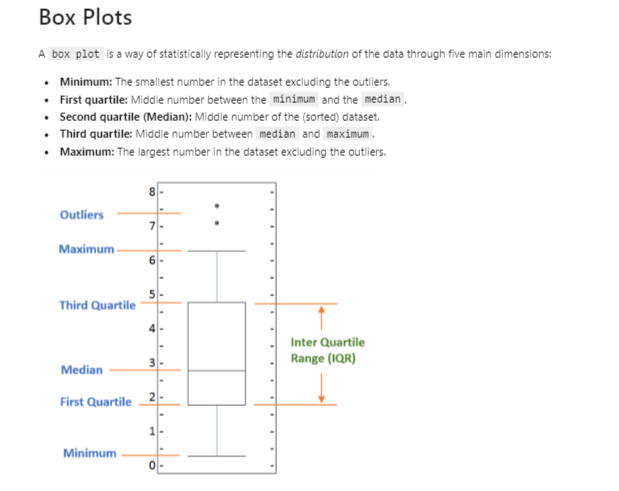

In [6]:
gender_data = df.loc[:, ['gender','salary']]
gender_f = gender_data.loc[gender_data['gender'] == 'F',:]
gender_f

gender_m = gender_data.loc[gender_data['gender'] == 'M',:]
gender_m
gender_f.head()

,gender,salary
0,F,6684.0
164,F,4231.0
300,F,4112.0
301,F,4112.0
302,F,4292.0


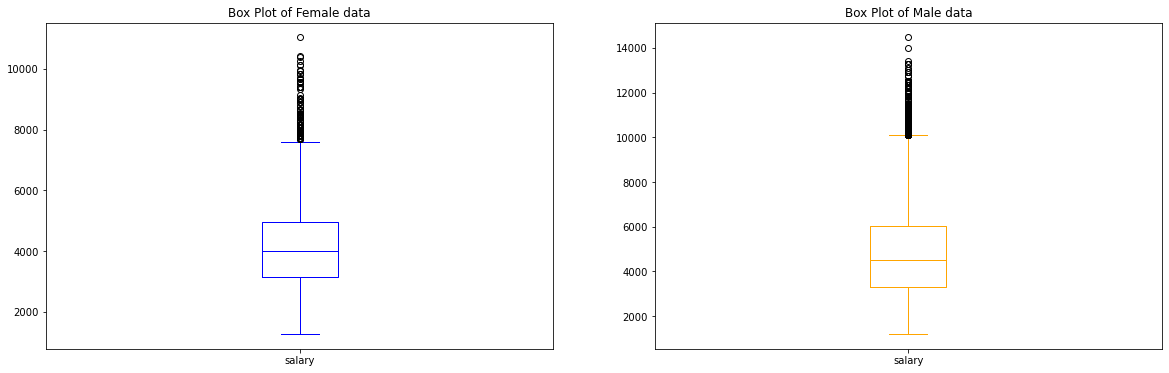

In [7]:

fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# Subplot 1: Female data
gender_f.plot(kind='box', color='blue', figsize=(20, 6), ax=ax0)
ax0.set_title('Box Plot of Female data')

# Subplot 2: Male data
gender_m.plot(kind='box', color = 'orange', figsize=(20, 6), ax=ax1)
ax1.set_title ('Box Plot of Male data')

plt.show()

### 3. What insight can be derived from this form of the chart?

In [8]:
gender_f.describe()

,salary
count,3926.000000
mean,4185.462274
std,1523.383725
min,1267.000000
25%,3152.750000
50%,3996.000000
75%,4951.000000
max,11036.000000


Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:

larger than Q3 by at least 1.5 times the interquartile range (IQR), or, <br>
smaller than Q1 by at least 1.5 times the IQR.

Let's look at female data as an example:

Q1 (25%) = 3,152.75 <br>
Q3 (75%) = 4,951 <br>
IQR = Q3 - Q1 = 1,798.25
Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 4,951 + (1.5 * 1,798.25) <br>
Outlier > 7,648.38

In [9]:
gender_m.describe()

,salary
count,15862.000000
mean,4854.515502
std,2064.391049
min,1200.000000
25%,3322.000000
50%,4505.000000
75%,6040.000000
max,14464.000000


We can do the same for male data:

Q1 (25%) = 3,322 <br>
Q3 (75%) = 6,040 <br>
IQR = Q3 - Q1 = 2,718
Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 6,040 + (1.5 * 2,718) <br>
Outlier > 10,117